In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot

In [2]:
import pandas as pd
import yfinance as yf

def get_top_nse_stocks(n=20):
    """
    Function to retrieve the top N stocks by market capitalization on the NSE.

    Args:
    - n: Number of top stocks to retrieve (default is 20).

    Returns:
    - List of dictionaries containing stock ticker symbol and company name.
    """
    top_stocks = [
        {"symbol": "RELIANCE.NS", "company": "Reliance Industries Limited"},
        {"symbol": "TCS.NS", "company": "Tata Consultancy Services Limited"},
        {"symbol": "HDFCBANK.NS", "company": "HDFC Bank Limited"},
        {"symbol": "HINDUNILVR.NS", "company": "Hindustan Unilever Limited"},
        {"symbol": "ICICIBANK.NS", "company": "ICICI Bank Limited"},
        {"symbol": "INFY.NS", "company": "Infosys Limited"},
        {"symbol": "KOTAKBANK.NS", "company": "Kotak Mahindra Bank Limited"},
        {"symbol": "ITC.NS", "company": "ITC Limited"},
        {"symbol": "BAJFINANCE.NS", "company": "Bajaj Finance Limited"},
        {"symbol": "AXISBANK.NS", "company": "Axis Bank Limited"},
        {"symbol": "BHARTIARTL.NS", "company": "Bharti Airtel Limited"},
        {"symbol": "WIPRO.NS", "company": "Wipro Limited"},
        {"symbol": "SBIN.NS", "company": "State Bank of India"},
        {"symbol": "DMART.NS", "company": "Avenue Supermarts Limited"},
        {"symbol": "ASIANPAINT.NS", "company": "Asian Paints Limited"},
        {"symbol": "ULTRACEMCO.NS", "company": "UltraTech Cement Limited"},
        {"symbol": "MARUTI.NS", "company": "Maruti Suzuki India Limited"},
        {"symbol": "LT.NS", "company": "Larsen & Toubro Limited"},
        {"symbol": "NESTLEIND.NS", "company": "Nestlé India Limited"},
        {"symbol": "SUNPHARMA.NS", "company": "Sun Pharmaceutical Industries Limited"}
    ]

    return top_stocks[:n]

def fetch_stock_data(symbol, start_date, end_date):
    """
    Function to fetch historical daily stock price data for a given symbol.

    Args:
    - symbol: Stock ticker symbol (e.g., 'AAPL' for Apple Inc.).
    - start_date: Start date of the historical data (YYYY-MM-DD).
    - end_date: End date of the historical data (YYYY-MM-DD).

    Returns:
    - Pandas DataFrame containing the historical stock price data.
    """
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data['Symbol'] = symbol  # Add a column for the stock symbol
    return stock_data

def preprocess_stock_data(stock_data):
    """
    Function to preprocess the fetched stock data.

    Args:
    - stock_data: Pandas DataFrame containing the historical stock price data.

    Returns:
    - Preprocessed stock data with adjusted close prices.
    """
    # Drop rows with missing values
    stock_data.dropna(inplace=True)

    # Adjust for stock splits and dividends, if necessary
    # You may need additional preprocessing steps depending on the data source

    return stock_data

# Main code
if __name__ == "__main__":
    # Define the date range for historical data
    start_date = "2018-08-01"
    end_date = "2023-08-01"

    # Get the top N stocks by market capitalization on the NSE
    top_stocks = get_top_nse_stocks(n=20)

    # List to store preprocessed data for all stocks
    all_stock_data = []

    # Fetch and preprocess data for each stock
    for stock_info in top_stocks:
        stock_symbol = stock_info['symbol']
        print(f"Fetching data for {stock_symbol}...")
        stock_data = fetch_stock_data(stock_symbol, start_date, end_date)
        preprocessed_data = preprocess_stock_data(stock_data)

        # Append preprocessed data to the list
        all_stock_data.append(preprocessed_data)

    # Combine preprocessed data for all stocks into one DataFrame
    combined_data = pd.concat(all_stock_data)

    # Save combined data to a CSV file
    combined_data.to_csv('combined_stock_data.csv')



Fetching data for RELIANCE.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for TCS.NS...
Fetching data for HDFCBANK.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HINDUNILVR.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ICICIBANK.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for INFY.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for KOTAKBANK.NS...


Fetching data for ITC.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for BAJFINANCE.NS...
Fetching data for AXISBANK.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BHARTIARTL.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WIPRO.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SBIN.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for DMART.NS...
Fetching data for ASIANPAINT.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for ULTRACEMCO.NS...


Fetching data for MARUTI.NS...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for LT.NS...
Fetching data for NESTLEIND.NS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SUNPHARMA.NS...


[*********************100%%**********************]  1 of 1 completed


In [59]:
reliance_data = combined_data[combined_data['Symbol'] == 'RELIANCE.NS']

In [49]:
sunpharma_data = combined_data[combined_data['Symbol'] == 'SUNPHARMA.NS']

In [5]:
reliance_data

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-01,1088.421631,1099.850830,1083.849976,1090.204590,1068.286377,10613527,RELIANCE.NS
2018-08-02,1089.427490,1089.427490,1066.066284,1068.260620,1046.783569,6834465,RELIANCE.NS
2018-08-03,1074.340942,1082.112793,1069.357788,1076.123901,1054.488647,7268029,RELIANCE.NS
2018-08-06,1075.895264,1093.541870,1074.661011,1090.433228,1068.510376,4392731,RELIANCE.NS
2018-08-07,1092.536133,1098.479370,1076.169556,1082.752808,1060.984375,4439806,RELIANCE.NS
...,...,...,...,...,...,...,...
2023-07-25,2494.000000,2505.199951,2480.000000,2485.800049,2477.050049,6013010,RELIANCE.NS
2023-07-26,2485.000000,2547.000000,2485.000000,2526.199951,2517.307617,6455506,RELIANCE.NS
2023-07-27,2534.050049,2537.649902,2490.350098,2502.699951,2493.890381,8613449,RELIANCE.NS


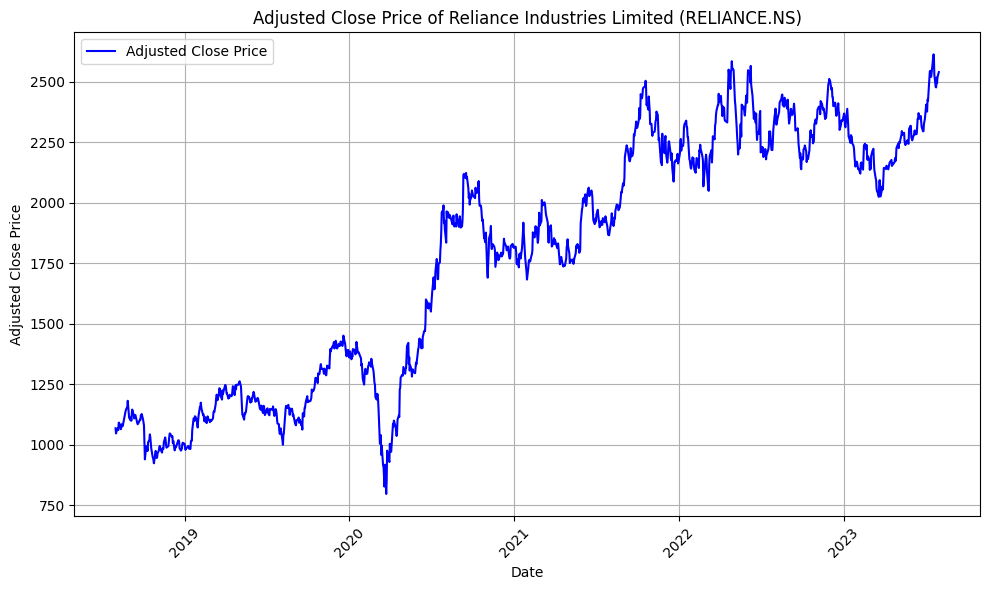

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure reliance_data DataFrame has 'Date' as index
if isinstance(reliance_data.index, pd.DatetimeIndex):
    # Plot the adjusted close price against time
    plt.figure(figsize=(10, 6))
    plt.plot(reliance_data.index, reliance_data['Adj Close'], color='blue', label='Adjusted Close Price')
    plt.title('Adjusted Close Price of Reliance Industries Limited (RELIANCE.NS)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The index of reliance_data DataFrame is not a DatetimeIndex.")


In [61]:
new_table = reliance_data.loc[:, ['Adj Close']]

# Display the new DataFrame
print(new_table)

              Adj Close
Date                   
2018-08-01  1068.286377
2018-08-02  1046.783569
2018-08-03  1054.488647
2018-08-06  1068.510376
2018-08-07  1060.984375
...                 ...
2023-07-25  2477.050049
2023-07-26  2517.307617
2023-07-27  2493.890381
2023-07-28  2518.952148
2023-07-31  2540.276611

[1233 rows x 1 columns]


In [62]:
import numpy as np

# Take the logarithm of the 'Adj Close' column
new_table['Adj Close'] = np.log(new_table['Adj Close'])

# Display the new DataFrame with logarithm applied
print(new_table)


            Adj Close
Date                 
2018-08-01   6.973811
2018-08-02   6.953477
2018-08-03   6.960811
2018-08-06   6.974021
2018-08-07   6.966952
...               ...
2023-07-25   7.814824
2023-07-26   7.830945
2023-07-27   7.821599
2023-07-28   7.831598
2023-07-31   7.840028

[1233 rows x 1 columns]


In [63]:
pip install arch


In [64]:
import arch
from arch import arch_model

# Create an ARCH model
am = arch_model(new_table['Adj Close'], vol='Arch', p=3, o=0, q=3, dist='Normal')

# Fit the model
res = am.fit(disp='off')

# Print model summary
print(res.summary())

# Get conditional volatility
cond_volatility = res.conditional_volatility

# Display conditional volatility
print(cond_volatility)


                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                524.141
Distribution:                  Normal   AIC:                          -1038.28
Method:            Maximum Likelihood   BIC:                          -1012.70
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:39:20   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.6961  6.862e-03   1121.618      0.000 [  7.683,  7.71

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09737. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [65]:
import arch
from arch import arch_model

# Create a GARCH model
garch_model = arch_model(new_table['Adj Close'], vol='Garch', p=4, o=0, q=2, dist='Normal')

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())

# Get conditional volatility
garch_cond_volatility = garch_result.conditional_volatility

# Display conditional volatility
print(garch_cond_volatility)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                341.324
Distribution:                  Normal   AIC:                          -666.648
Method:            Maximum Likelihood   BIC:                          -625.710
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:39:20   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.6936  5.265e-03   1461.204      0.000 [  7.683,  7.70

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09737. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [66]:
# Rescale the data by multiplying it by 10
rescaled_data = new_table['Adj Close'] * 1

# Create a GARCH model with rescaled data
garch_model = arch_model(rescaled_data, vol='Garch', p=4, o=0, q=2, dist='Normal')

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())

# Get conditional volatility
garch_cond_volatility = garch_result.conditional_volatility

# Display conditional volatility
print(garch_cond_volatility)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                341.324
Distribution:                  Normal   AIC:                          -666.648
Method:            Maximum Likelihood   BIC:                          -625.710
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:39:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.6936  5.265e-03   1461.204      0.000 [  7.683,  7.70

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09737. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [67]:
import arch
from arch import arch_model

# Rescale the 'Adj Close' data
rescaled_data = new_table['Adj Close'] * 10

# Create a GARCH model with the rescaled data
garch_model = arch_model(rescaled_data, vol='Garch', p=4, o=0, q=2, dist='Normal')

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())

# Get conditional volatility
garch_cond_volatility = garch_result.conditional_volatility

# Display conditional volatility
print(garch_cond_volatility)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2314.95
Distribution:                  Normal   AIC:                           4645.89
Method:            Maximum Likelihood   BIC:                           4686.83
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:39:27   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            76.9614      1.225     62.833      0.000 [ 74.561, 79.36

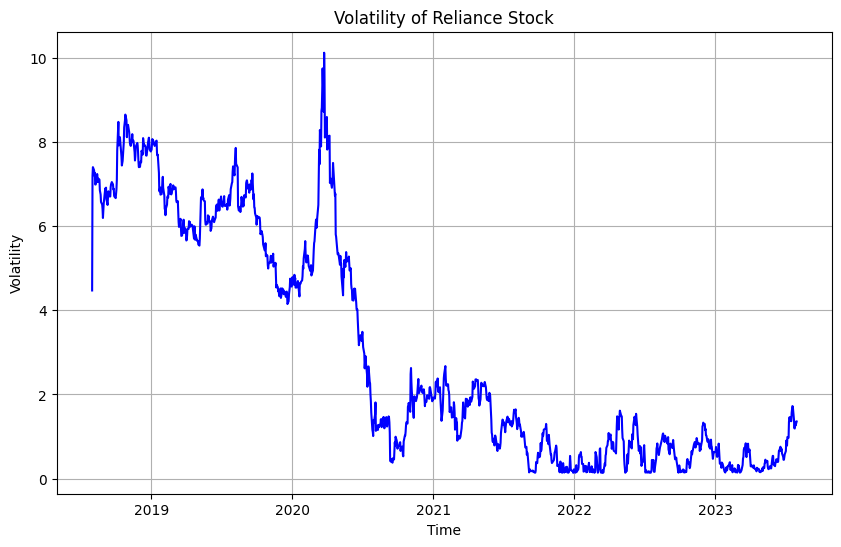

In [68]:

import matplotlib.pyplot as plt

# Plot volatility over time
plt.figure(figsize=(10, 6))
plt.plot(garch_cond_volatility, color='blue')
plt.title('Volatility of Reliance Stock')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


In [29]:
final_volatility = garch_cond_volatility[-1]

# Display the final volatility
print("Final volatility:", final_volatility)

Final volatility: 1.3574529155007606


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
X = np.array(new_table['Adj Close']).reshape(-1, 1)
y = np.array(new_table['Adj Close']).reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

# Predict volatility
lstm_cond_volatility = model.predict(X_test)

# Display conditional volatility
print(lstm_cond_volatility)


In [48]:
last_lstm_volatility = lstm_cond_volatility[-1]
print("Last volatility in LSTM:", last_lstm_volatility)

Last volatility in LSTM: [0.9931999]


In [50]:
sunpharma_data


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-01,570.000000,576.799988,563.799988,574.650024,542.403259,3672172,SUNPHARMA.NS
2018-08-02,575.900024,587.549988,575.299988,580.400024,547.830566,5898107,SUNPHARMA.NS
2018-08-03,583.900024,589.400024,583.849976,585.849976,552.974792,3298774,SUNPHARMA.NS
2018-08-06,586.500000,593.400024,575.099976,576.150024,543.819031,3867267,SUNPHARMA.NS
2018-08-07,580.450012,582.500000,568.250000,569.700012,537.731018,3076068,SUNPHARMA.NS
...,...,...,...,...,...,...,...
2023-07-25,1110.000000,1110.000000,1090.800049,1095.050049,1085.005615,1702900,SUNPHARMA.NS
2023-07-26,1097.050049,1114.400024,1094.099976,1112.000000,1101.800171,1321572,SUNPHARMA.NS
2023-07-27,1128.000000,1155.349976,1116.300049,1134.949951,1124.539551,6366612,SUNPHARMA.NS


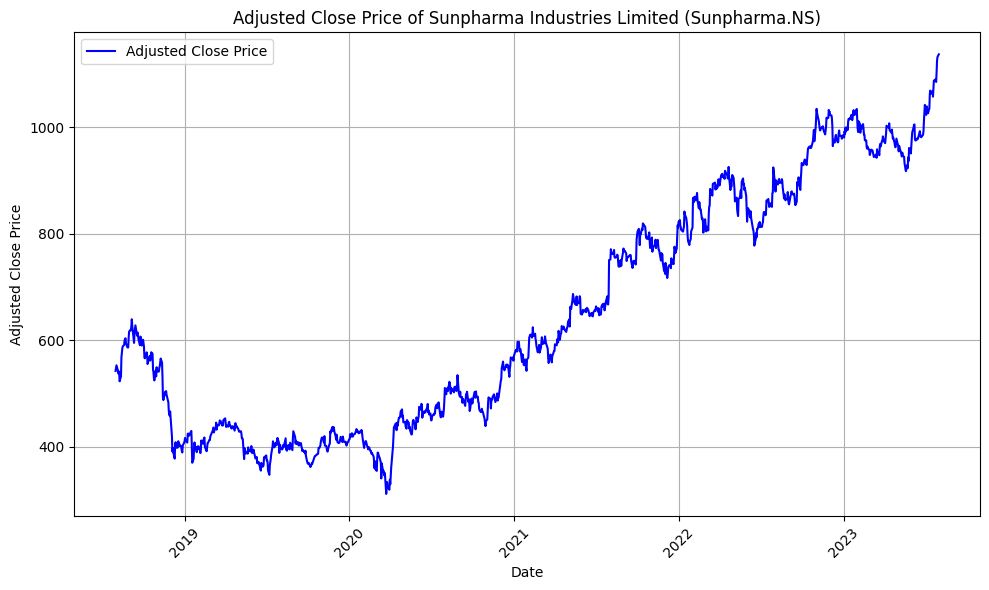

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sunpharma_data DataFrame has 'Date' as index
if isinstance(sunpharma_data.index, pd.DatetimeIndex):
    # Plot the adjusted close price against time
    plt.figure(figsize=(10, 6))
    plt.plot(sunpharma_data.index, sunpharma_data['Adj Close'], color='blue', label='Adjusted Close Price')
    plt.title('Adjusted Close Price of Sunpharma Industries Limited (Sunpharma.NS)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The index of sunpharma_data DataFrame is not a DatetimeIndex.")


In [52]:
new_tabl = sunpharma_data.loc[:, ['Adj Close']]

# Display the new DataFrame
print(new_table)

            Adj Close
Date                 
2018-08-01   6.296010
2018-08-02   6.305966
2018-08-03   6.315312
2018-08-06   6.298617
2018-08-07   6.287358
...               ...
2023-07-25   6.989340
2023-07-26   7.004701
2023-07-27   7.025129
2023-07-28   7.031827
2023-07-31   7.036077

[1233 rows x 1 columns]


In [53]:
import numpy as np

# Take the logarithm of the 'Adj Close' column
new_tabl['Adj Close'] = np.log(new_tabl['Adj Close'])

# Display the new DataFrame with logarithm applied
print(new_tabl)

            Adj Close
Date                 
2018-08-01   6.296010
2018-08-02   6.305966
2018-08-03   6.315312
2018-08-06   6.298617
2018-08-07   6.287358
...               ...
2023-07-25   6.989340
2023-07-26   7.004701
2023-07-27   7.025129
2023-07-28   7.031827
2023-07-31   7.036077

[1233 rows x 1 columns]


In [54]:
import arch
from arch import arch_model

# Rescale the 'Adj Close' data
rescaled_data = new_tabl['Adj Close'] * 10

# Create a GARCH model with the rescaled data
garch_model = arch_model(rescaled_data, vol='Arch', p=3, o=0, q=3, dist='Normal')
# Fit the model
res = am.fit(disp='off')

# Print model summary
print(res.summary())

# Get conditional volatility
cond_volatility = res.conditional_volatility

# Display conditional volatility
print(cond_volatility)


                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -24.7359
Distribution:                  Normal   AIC:                           59.4719
Method:            Maximum Likelihood   BIC:                           85.0579
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:38:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.3898  1.295e-02    493.478      0.000 [  6.364,  6.41

In [57]:
import arch
from arch import arch_model

# Rescale the 'Adj Close' data
rescaled_data = new_tabl['Adj Close'] * 10

# Create a GARCH model with the rescaled data
garch_model = arch_model(rescaled_data, vol='Garch', p=4, o=0, q=2, dist='Normal')

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())

# Get conditional volatility
garch_cond_volatility = garch_result.conditional_volatility

# Display conditional volatility
print(garch_cond_volatility)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2863.82
Distribution:                  Normal   AIC:                           5743.65
Method:            Maximum Likelihood   BIC:                           5784.58
                                        No. Observations:                 1233
Date:                Sat, Apr 13 2024   Df Residuals:                     1232
Time:                        20:38:35   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            63.8982      0.138    462.060      0.000 [ 63.627, 64.16

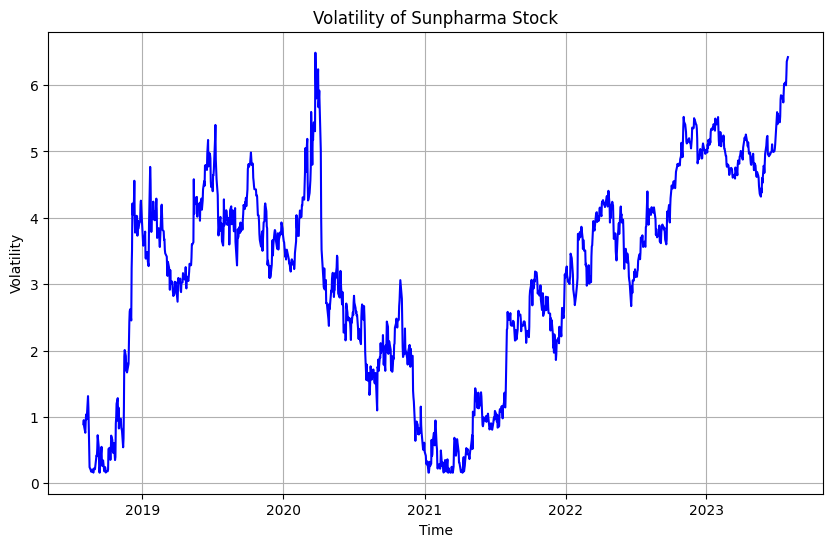

In [58]:
import matplotlib.pyplot as plt

# Plot volatility over time
plt.figure(figsize=(10, 6))
plt.plot(garch_cond_volatility, color='blue')
plt.title('Volatility of Sunpharma Stock')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()
